# Hierarchical Clustering

In [ ]:
# Agglomerative = bottom to Top Clustering of datapoints
# Three most imp library in ML are : Scikit learn , Tensorflow & Scipy

# Scipy library's cluster module & submodule hierarchy is used to plot dendograms in ML models for clustering
# dendrogram is the function within this submodule used for plotting dendrogram.
# import scipy.cluster.hierarchy as sch

# AgglomerativeClustering class of cluster module from Scikit library is used for Hierarichal Agglomerative(Bottom to top) clustering.

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values   #Explained in KMeans clustering code

## Using the dendrogram to find the optimal number of clusters

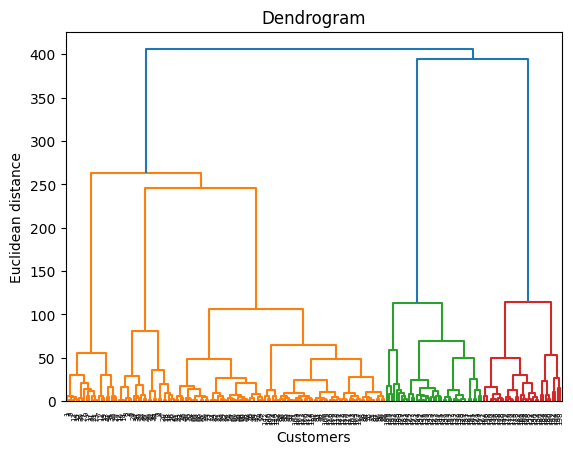

In [ ]:
import scipy.cluster.hierarchy as sch      #sch.dendrogram signify accessing dendrogram fxn from sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))  #sch.linkage accesses the matrix to form clusters & method = ward = minimising variance/dist
plt.title('Dendrogram')
plt.xlabel('Customers')   #Customers is not column here , but all the rows of X matrix & their relationship.
plt.ylabel('Euclidean distance')
plt.show()

# Now splitting from the largest distance = highest verical move b/w the dendrogram to get optimal no of clusters fo X = no of vertical lines present.
#400-385 (Not max vertical dist covered) , 385-265 (No) , 265-255(No), 255-110 ( YES Max Vertical Distance) - Threshold Here = 5 clusters
#Until we met next horizontal bar.

## Training the Hierarchical Clustering model on the dataset

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean' , linkage = 'ward') #no of clusters , dist calcn metrics , Cluster method = min variance
y_hc = hc.fit_predict(X)

# y_hc will store the predicted cluster vaue for each datapoint in X matrix trained on agglomerative hierarichal clustering &
# dendrogram giving optimal no of cluster to train model on.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

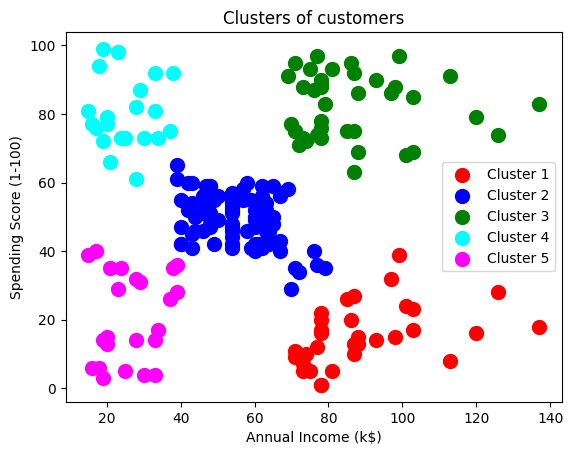

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#With low cluster == 2,3 , model will classify the low income & high income with low & high spending score in one cluster & isn't ideal.